In [55]:
#Basics
import numpy as np
import pandas as pd
from IPython.display import Markdown, display
# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
# Metrics
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn import set_config
set_config(display= 'diagram')

In [20]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [21]:
# dropping the id column
df.drop('id', axis=1, inplace=True)

In [22]:
# checking the distribution of gender
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [23]:
# dropping the row with gender 'other'
df.drop(df[df.gender == 'Other'].index, inplace = True)

<AxesSubplot:xlabel='Count', ylabel='stroke'>

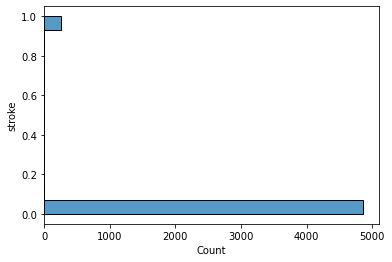

In [58]:
sns.histplot(data=df, y="stroke")

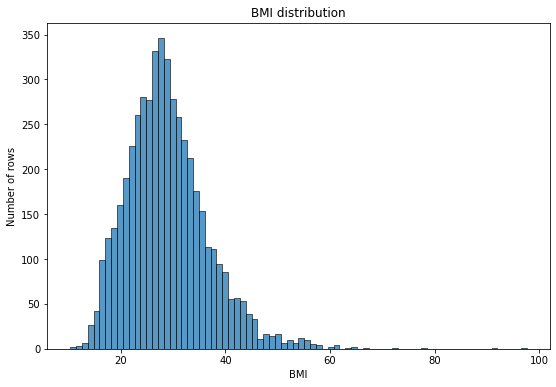

In [24]:
# distribution of the BMI column
fig ,ax = plt.subplots(figsize = (9,6))
sns.histplot(df['bmi'])
ax.set_title('BMI distribution')
ax.set_xlabel('BMI')
ax.set_ylabel('Number of rows')
plt.show()

In [25]:
# checking the smoking status for 'unknown' and age below 13
df[(df['smoking_status'] == 'Unknown') & (df['age'] < 13)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
249,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
251,Female,8.00,0,0,No,Private,Urban,110.89,17.6,Unknown,0
282,Female,3.00,0,0,No,children,Urban,73.74,16.0,Unknown,0
291,Male,4.00,0,0,No,children,Rural,79.17,20.0,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
5078,Female,8.00,0,0,No,children,Urban,76.31,15.5,Unknown,0
5079,Male,1.72,0,0,No,children,Urban,77.28,17.1,Unknown,0
5089,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0
5095,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0


In [26]:
# reclassify those who are under 13 as never smoker
df.loc[((df['smoking_status'] == 'Unknown') & (df['age'] < 13)), 'smoking_status'] = 'never smoked'

In [27]:
df['smoking_status'].value_counts()

never smoked       2439
Unknown             997
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [28]:
# distribution of stroke
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [29]:
# checking the dataset for those who considered diabetic
diabetes = df.loc[df['avg_glucose_level'] > 200].sort_values(by = 'age' , ascending = True)
diabetes

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2079,Female,4.0,0,0,No,children,Rural,206.25,17.0,never smoked,0
1277,Female,6.0,0,0,No,children,Urban,201.25,NaN,never smoked,0
1512,Female,12.0,0,0,No,children,Rural,207.45,25.4,smokes,0
1841,Male,12.0,0,0,No,children,Rural,213.87,25.3,never smoked,0
3734,Female,13.0,0,0,No,children,Rural,219.81,NaN,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
187,Female,82.0,1,1,Yes,Govt_job,Urban,215.94,27.9,formerly smoked,1
4763,Male,82.0,0,0,Yes,Private,Urban,217.57,33.5,formerly smoked,0
128,Male,82.0,0,0,Yes,Govt_job,Urban,200.59,29.0,formerly smoked,1
337,Female,82.0,0,1,No,Private,Urban,215.60,24.9,never smoked,0


In [30]:
# checking the bmi over 70
diabetes[diabetes.bmi > 70].index

Int64Index([544], dtype='int64')

In [31]:
df.drop(df[df.index == 544].index, inplace = True)
#diabetes[diabetes.index == 544]

In [32]:
# adding new column to categorize the glucose level
df.loc[df['avg_glucose_level'] < 70, 'blood_sugar_cat'] = 'hypoglycemia'
df.loc[(df['avg_glucose_level'] >= 70) & (df['avg_glucose_level'] <= 140), 'blood_sugar_cat'] = 'normal'
df.loc[(df['avg_glucose_level'] > 140) & (df['avg_glucose_level'] <= 200), 'blood_sugar_cat'] = 'pre-diabetic'
df.loc[df['avg_glucose_level'] > 200, 'blood_sugar_cat'] = 'diabetic'

In [38]:
# Simple imputer for missing bmi values, re 
df['bmi'] = SimpleImputer(missing_values=np.nan, strategy='median')

In [39]:
# train test split
X = df.drop(columns = 'stroke', axis = 1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 42)

### Create three separate transformation pipelines:

- Ordinal Categorical
- Nominal Categorical
- Numeric

In [41]:
cat_list = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [43]:
#define numeric pipeline with standard scaler
num_pipe = Pipeline([('numimputer', SimpleImputer(strategy = 'most_frequent')), ('numnorm', StandardScaler())])

#define ordinal pipeline with Standard scaler
ord_pipe = Pipeline([
    ('ordimputer', SimpleImputer(strategy = 'most_frequent')),
    ('ordenc', OrdinalEncoder(categories = [cat_list])),
    ('ordnorm', StandardScaler())])

#define categorical pipeline
cat_pipe = Pipeline([
    ('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, drop = 'first')), 
    ('onehotnorm', StandardScaler())])

cat_list

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [44]:
num_cols = X_train.select_dtypes(['int', 'float']).columns

ct = ColumnTransformer(
    [("ordinalpipe", ord_pipe, [cat_list]), 
     ("nominalpipe", cat_pipe, ['hypertension','heart_disease']),
     ("numpipe", num_pipe, num_cols)])

num_cols

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level'], dtype='object')

In [45]:
ct

ColumnTransformer(transformers=[('ordinalpipe',
                                 Pipeline(steps=[('ordimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordenc',
                                                  OrdinalEncoder(categories=[['gender',
                                                                              'ever_married',
                                                                              'work_type',
                                                                              'Residence_type',
                                                                              'smoking_status']])),
                                                 ('ordnorm',
                                                  StandardScaler())]),
                                 [['gender', 'ever_married', 'work_type',
                                   'Residence_type', 'smoking_status']]),
                                ('nominalpipe'...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotenc',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False)),
                                                 ('onehotnorm',
                                                  StandardScaler())]),
                                 ['hypertension', 'heart_disease']),
                                ('numpipe',
                                 Pipeline(steps=[('numimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('numnorm',
                                                  StandardScaler())]),
                                 Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level'], dtype='object'))])